In [1]:
#библиотеки
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) 
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)
from fbprophet import Prophet
import plotly.offline as py
from matplotlib import pyplot as plt

3.7.1


In [2]:
df = pd.read_csv('/Users/aleksandr/Desktop/Яндекс задание/Yandex_data.csv')

In [3]:
df.Time = pd.to_datetime(df.Time)

In [4]:
# визуализация данных
plot = df.groupby('Time')['Yandex.Browser_visits'].sum()
py.iplot([go.Scatter(
    x=plot.index,
    y=plot
)])

In [5]:
df2 = df
df2.columns = ['ds', 'y']

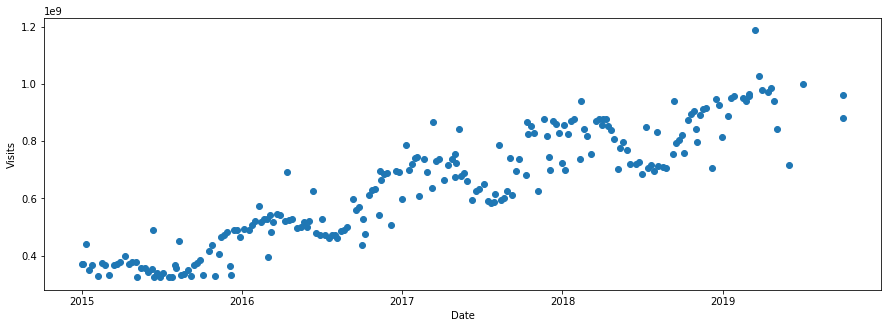

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df2['ds'], df2['y'], linestyle='None', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Visits');

In [7]:
m = Prophet(weekly_seasonality= True, interval_width=0.95)
m.fit(df2);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# период построения прогноза до 2021 года
future = m.make_future_dataframe(periods = 65, freq='w')
future.tail()

,ds
286,2020-11-29
287,2020-12-06
288,2020-12-13
289,2020-12-20
290,2020-12-27


In [9]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,3.045120e+08,2.298609e+08,4.543704e+08,3.045120e+08,3.045120e+08,3.955363e+07,3.955363e+07,3.955363e+07,-1.454998e+07,-1.454998e+07,-1.454998e+07,5.410361e+07,5.410361e+07,5.410361e+07,0.0,0.0,0.0,3.440656e+08
1,2015-01-03,3.049513e+08,2.290102e+08,4.565468e+08,3.049513e+08,3.049513e+08,4.002915e+07,4.002915e+07,4.002915e+07,-1.469320e+07,-1.469320e+07,-1.469320e+07,5.472235e+07,5.472235e+07,5.472235e+07,0.0,0.0,0.0,3.449804e+08
2,2015-01-11,3.084657e+08,2.429260e+08,4.725653e+08,3.084657e+08,3.084657e+08,4.899630e+07,4.899630e+07,4.899630e+07,4.030934e+05,4.030934e+05,4.030934e+05,4.859320e+07,4.859320e+07,4.859320e+07,0.0,0.0,0.0,3.574619e+08
3,2015-01-18,3.115407e+08,2.527778e+08,4.780809e+08,3.115407e+08,3.115407e+08,4.716576e+07,4.716576e+07,4.716576e+07,4.030934e+05,4.030934e+05,4.030934e+05,4.676267e+07,4.676267e+07,4.676267e+07,0.0,0.0,0.0,3.587065e+08
4,2015-01-25,3.146158e+08,2.639521e+08,4.954780e+08,3.146158e+08,3.146158e+08,6.260847e+07,6.260847e+07,6.260847e+07,4.030934e+05,4.030934e+05,4.030934e+05,6.220537e+07,6.220537e+07,6.220537e+07,0.0,0.0,0.0,3.772243e+08
5,2015-02-08,3.207660e+08,2.817000e+08,5.144136e+08,3.207660e+08,3.207660e+08,7.664071e+07,7.664071e+07,7.664071e+07,4.030934e+05,4.030934e+05,4.030934e+05,7.623762e+07,7.623762e+07,7.623762e+07,0.0,0.0,0.0,3.974067e+08
6,2015-02-15,3.238410e+08,2.681346e+08,4.866121e+08,3.238410e+08,3.238410e+08,4.907036e+07,4.907036e+07,4.907036e+07,4.030934e+05,4.030934e+05,4.030934e+05,4.866727e+07,4.866727e+07,4.866727e+07,0.0,0.0,0.0,3.729114e+08
7,2015-02-22,3.269161e+08,2.356595e+08,4.663965e+08,3.269161e+08,3.269161e+08,2.389553e+07,2.389553e+07,2.389553e+07,4.030934e+05,4.030934e+05,4.030934e+05,2.349244e+07,2.349244e+07,2.349244e+07,0.0,0.0,0.0,3.508116e+08
8,2015-03-05,3.317484e+08,2.734997e+08,5.003487e+08,3.317484e+08,3.317484e+08,5.742125e+07,5.742125e+07,5.742125e+07,1.774411e+07,1.774411e+07,1.774411e+07,3.967715e+07,3.967715e+07,3.967715e+07,0.0,0.0,0.0,3.891696e+08
9,2015-03-15,3.361413e+08,2.940228e+08,5.253027e+08,3.361413e+08,3.361413e+08,7.687807e+07,7.687807e+07,7.687807e+07,4.030934e+05,4.030934e+05,4.030934e+05,7.647497e+07,7.647497e+07,7.647497e+07,0.0,0.0,0.0,4.130194e+08


In [10]:
# Визуализация предсказанных данных
py.iplot([
    go.Scatter(x=df2['ds'], y=df2['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

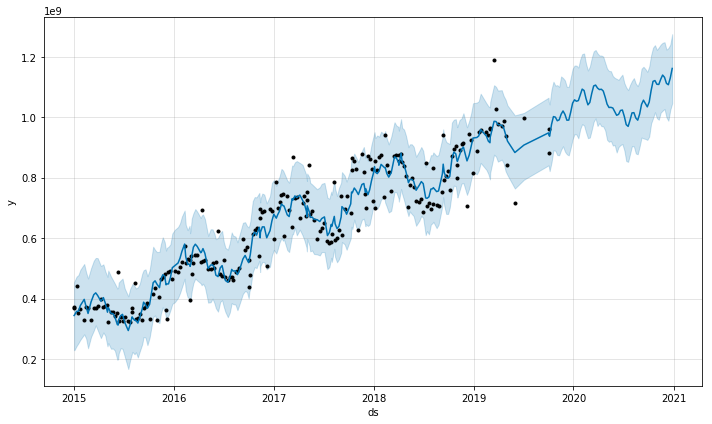

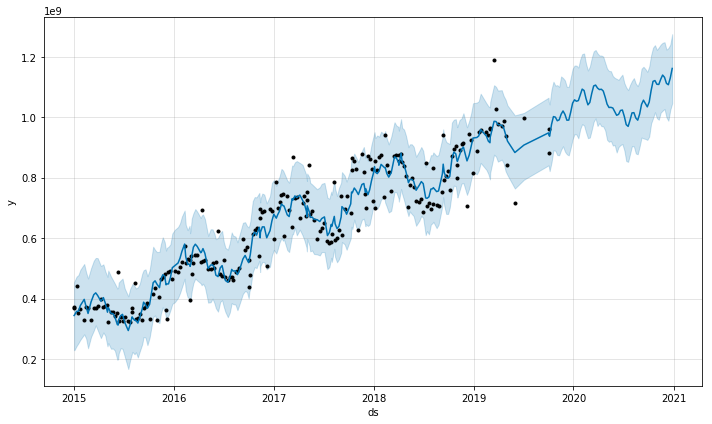

In [11]:
m.plot(forecast)

In [12]:
plotly_df(forecast.set_index('ds')[['yhat']])

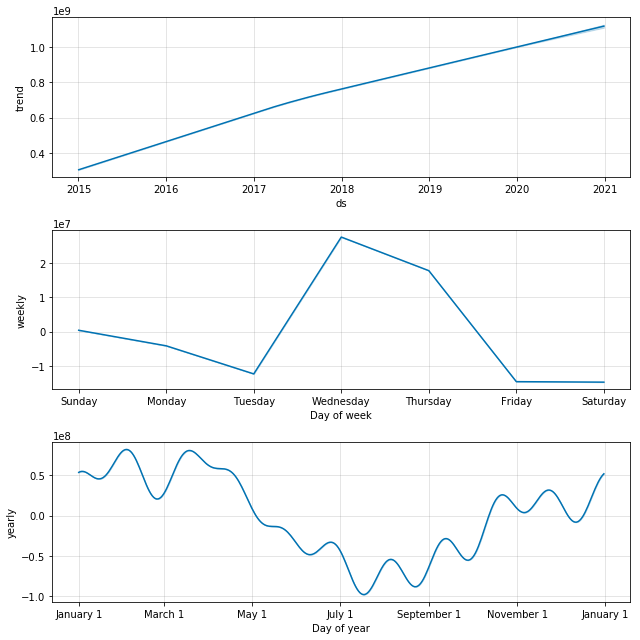

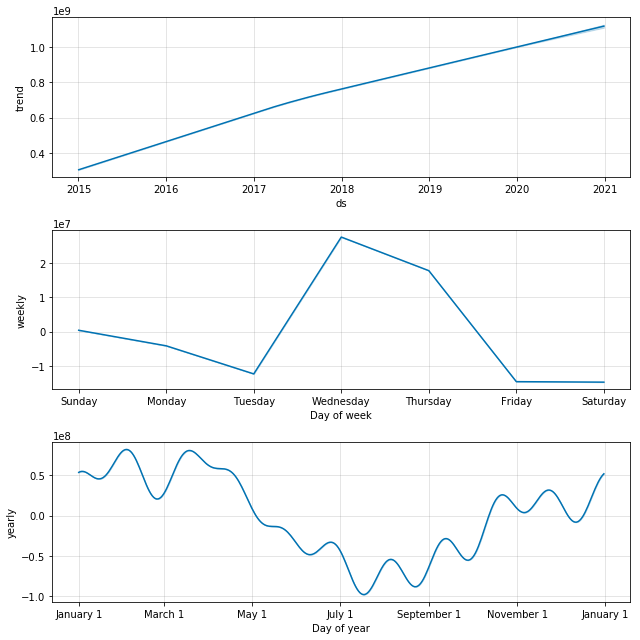

In [13]:
m.plot_components(forecast)
# На графиках мы видим присутствие сезонной зависимости использования браузера: каждый год в летние месяцы (вторая половина июля - конец августа)
# значительным образом падает количество использований браузера.
# Также можем наблюдать разброс по посещению в зависимости от дня недели - максимальное количество посещений в середине рабочей недели

In [14]:
# Предсказанные данные 
forecast.to_csv('Full_forecast.csv')
forecast[['ds', 'yhat']].to_csv('Brief_forecast.csv')

In [15]:
# Проверка качества предсказаний на имеющихся данных до 2019 года
test = pd.concat([df2.set_index('ds'),forecast.set_index('ds')], axis=1, join='inner')

In [16]:
cols = ['y', 'yhat', 'yhat_lower', 'yhat_upper']
test = test[cols]
test['y'] = test.y
test['yhat'] = (test.yhat).round(2)
test['yhat_lower'] = (test.yhat_lower).round(2)
test['yhat_upper'] = (test.yhat_upper).round(2)

test.tail()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2019-07-04,998352175,9.077414e+08,7.930211e+08,1.014119e+09
2019-04-14,970760152,9.732508e+08,8.596170e+08,1.089293e+09
2019-04-21,986230019,9.647892e+08,8.479666e+08,1.070364e+09
2019-04-28,938984142,9.429114e+08,8.216053e+08,1.058229e+09
2019-05-05,843175400,9.209762e+08,8.083281e+08,1.039005e+09


In [17]:
# Метрика качества предсказаний: Средняя абсолютная ошибка, оценка точности полученных предсказаний
# 100% - MAPE = 93%
test['e'] = test.y - test.yhat
mape = np.round(np.mean(np.abs(100*test.e/test.y)), 0)
print('MAPE =', mape, '%')

MAPE = 7.0 %
